# Sprint 1: Data analysis and supervised learning

## Opmerkingen dataset

* Complaint volume moet in verband worden gebracht met de grootte en het marktaandeel van het bedrijf.
Een bedrijf met een groot aantal klanten zal bijvoorbeeld meer klachten hebben dan één met een klein aantal klanten.

## Inlezen dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re, string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder

punc = list(set(string.punctuation))
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

def read_all_complaints() :
    # Store all the data of the complaints in an array of maps. (amount of maps = amount of complaints)
    all_complaints = []
    with open('data/complaints-100.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print("All the information stored about a complaint:")
                #for category in row:
                    #print("-" + category)
                line_count += 1
            else: 
                complaint=[]
                full_complaint = " ".join(row[1:5])
                complaint.append(row[1])
                complaint.append(row[5])
                #complaint.append(full_complaint.lower())
                narrative=row[5]
                narrative=narrative.lower()
                narrative = re.sub(r'[^\w\s]','',narrative)
                narrative = re.sub(r'[0-9]|,','',narrative)
                narrative = narrative.replace('\r',' ')
                narrative = narrative.replace('\n',' ')
                narrative = narrative.replace('x','')
                narrative = re.sub(r'( )+',' ',narrative)
                narrative_arr = narrative.split(' ')
                no_stop = [w for w in narrative_arr if w not in stop_words]
                complaint.append(narrative)
                all_complaints.append(complaint)
                line_count += 1
        print(f'File processed of {line_count} lines.')
        return all_complaints
    csv_file.close()
    

complaints = read_all_complaints()
#print(complaints)


#df = pd.DataFrame(complaints, columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue']) 
df = pd.DataFrame(complaints, columns = ['product','narrative','narrative_clean']) 
print("Number of complaints in dataset: ",df.shape[0])
df.replace({'product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 'credit',
              'Credit reporting, repair, or other' : 'credit',
              'Credit reporting' : 'credit',
              'Debt collection': 'dept',
              'Credit card or prepaid card': 'card',
              'Credit card': 'card',
              'Vehicle loan or lease': 'loan',
              'Student loan': 'loan',
              'Bank account or service' : 'account',
              'Consumer Loan' : 'loan',
              'Payday loan' : 'loan',
              'Money transfers' : 'money transfers',
              'Prepaid card' : 'card',
              'Other financial service' : 'other services',
              'Virtual currency' : 'money transfers',
              'Checking or savings account': 'account',
              'Mortgage': 'mortage',
              'Payday loan, title loan, or personal loan': 'loan',
              'Money transfer, virtual currency, or money service': 'money transfers'
             }}, inplace= True)
df




All the information stored about a complaint:
File processed of 120 lines.
Number of complaints in dataset:  119


,product,narrative,narrative_clean
0,credit,I have complained many times that the credit r...,i have complained many times that the credit r...
1,dept,please review the current fraud account and al...,please review the current fraud account and al...
2,dept,Called multiple times over the years for a deb...,called multiple times over the years for a deb...
3,dept,I sent in a letter to the company to have them...,i sent in a letter to the company to have them...
4,credit,On XX/XX/19 I applied for a Debt Relief Produc...,on i applied for a debt relief product from th...
...,...,...,...
114,dept,I am a victim of identity theft and this debt ...,i am a victim of identity theft and this debt ...
115,account,Over the last two years I have had egregious d...,over the last two years i have had egregious d...
116,card,On XX/XX/2018 I received a call from American ...,on i received a call from american epress offe...
117,credit,On or before XX/XX/XXXX XXXX XXXX XXXX offered...,on or before offered free credit report statem...


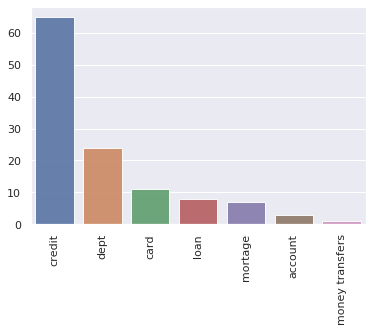

In [4]:
product_count = df['product'].value_counts()
product_count 
sns.set(style="darkgrid")
ax = sns.barplot(product_count.index, product_count.values, alpha=0.9)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [5]:
df_credit = df.loc[df['product'] == 'credit'] 
df_dept = df.loc[df['product'] =='dept']
df_card = df.loc[df['product'] == 'card'] 
df_loan = df.loc[df['product'] =='loan']
df_mortage = df.loc[df['product'] =='mortage']
df_account = df.loc[df['product'] =='account']
df_money_transfers = df.loc[df['product'] =='money transfers']

#Holding out 5 articles from each class for prediction at the end
df_credit_holdout = df_credit.iloc[:5]
df_dept_holdout = df_dept.iloc[:5]
df_card_holdout = df_card.iloc[:5]
df_loan_holdout = df_loan.iloc[:5]
df_mortage_holdout = df_mortage.iloc[:5]
df_account_holdout = df_account.iloc[:5]
df_money_transfers_holdout = df_money_transfers.iloc[:5]


df_credit = df_credit.iloc[5:]
df_dept = df_dept.iloc[5:]
df_card = df_card.iloc[5:]
df_loan = df_loan.iloc[5:]
df_mortage = df_mortage.iloc[5:]
df_account = df_account.iloc[5:]
df_money_transfers = df_money_transfers.iloc[5:]

#Appending the dfs back together
df = pd.concat([df_credit, df_dept, df_card, df_loan, df_mortage, df_account, df_money_transfers ])
df_holdout = pd.concat([df_credit_holdout, df_dept_holdout, df_card_holdout, df_loan_holdout, df_mortage_holdout, df_account_holdout, df_money_transfers_holdout ])

#Turning the labels into numbers
LE = LabelEncoder()
df['product_num'] = LE.fit_transform(df['product'])

display(df.groupby(['product'])['narrative'].count())
display(df_holdout.groupby(['product'])['narrative'].count())
display(df['product'].unique())
display(df['product_num'].unique())

product
card        6
credit     60
dept       19
loan        3
mortage     2
Name: narrative, dtype: int64

product
account            3
card               5
credit             5
dept               5
loan               5
money transfers    1
mortage            5
Name: narrative, dtype: int64

array(['credit', 'dept', 'card', 'loan', 'mortage'], dtype=object)

array([1, 2, 0, 3, 4])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def word_freqs(df):
    try:
        count_vect = CountVectorizer(analyzer='word',stop_words="english", ngram_range=(1, 1),min_df=1, max_df=1.0)
        df['narrative_clean']
        X_train_counts = count_vect.fit_transform(df['narrative_clean'])

        feature_names=count_vect.get_feature_names()
        feature_names

        word_count=[]
        for i in range(len(feature_names)):
            word_count.append(0)

        for complaint in X_train_counts.toarray():
            counter = 0
            for word in complaint:
                word_count[counter] += word
                counter += 1

        df_wc =  pd.DataFrame({'name':feature_names, 'count':word_count})
        df_wc = df_wc.sort_values(by=["count"],ascending=False).head(n=15)
        return df_wc.reset_index(drop=True)
    except ValueError:
        print("Empty vocabulary")
        
        

In [49]:
credit_wc = word_freqs(df_credit)
dept_wc = word_freqs(df_dept)
card_wc = word_freqs(df_card)
loan_wc = word_freqs(df_loan)
morate_wc = word_freqs(df_mortage)
#account_wc = word_freqs(df_account)
#money_transfers_wc = word_freqs(df_money_transfers)

df_wf = pd.concat([credit_wc, dept_wc, card_wc, loan_wc,morate_wc, money_transfers_wc], axis=1)
cols = ['cred', 'count', 'dept', 'count', 'card', 'count', 'loan', 'count', 'mortage', 'count']

df_wf.columns = cols
df_wf

,cred,count,dept,count,card,count,loan,count,mortage,count
0,credit,142,credit,27,card,33,aes,26,account,5
1,reporting,95,account,24,credit,18,borrower,11,money,4
2,account,85,debt,19,told,12,phone,9,check,4
3,report,78,law,19,account,11,sent,7,tiaa,4
4,information,77,letter,19,balance,10,payments,7,contacted,3
5,consumer,54,day,18,called,8,repayment,7,cashed,3
6,eperian,32,firm,16,bank,8,income,7,told,3
7,agency,24,said,15,td,7,sensitivebased,7,access,3
8,file,24,report,15,closed,7,plan,7,ive,3
9,late,23,called,15,payments,7,received,6,im,3
